In [1]:
%load_ext autoreload
%autoreload 2

import gpjax as gpx
import pickle
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
from gpjax.kernels import RBF, Linear, Periodic

from kernels import OrnsteinUhlenbeck
from kernelsearch import KernelSearch, describe_kernel
from util import calculate_example_lightcurve

rng_key = jax.random.PRNGKey(42)

plt.style.use(
    "https://raw.githubusercontent.com/JaxGaussianProcesses/GPJax/main/docs/examples/gpjax.mplstyle"
)
cols = mpl.rcParams["axes.prop_cycle"].by_key()["color"]

# CREATE ARTIFICAL DATA

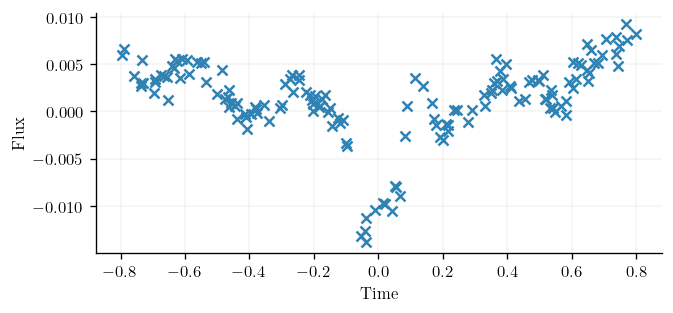

In [2]:
white_noise_std = 0.001
phi = 0
(
    t_train,
    lc_train,
    train_mask,
    t,
    lightcurve,
    systematics,
    noise,
    mask,
) = calculate_example_lightcurve(noise_std=white_noise_std, phi=phi)

noise_std = white_noise_std / jnp.sqrt(1 - phi**2)
# mean = jnp.mean(lc_train[train_mask])
# lc_train -= mean

plt.scatter(t_train, lc_train)
plt.ylabel("Flux")
plt.xlabel("Time")
plt.savefig("figures/data.pdf")

## PERFORM KERNEL SEARCH

In [3]:
kernel_library = [
    Linear(),
    RBF(),
    OrnsteinUhlenbeck(),
    Periodic(),
    # PoweredExponential(power=jnp.array(0.8)),
]  # default powered exponential has infinite parameter for some reason

In [4]:
tree = KernelSearch(
    kernel_library,
    X=jnp.array(t_train[train_mask]),
    y=jnp.array(lc_train[train_mask]),
    obs_stddev=noise_std,
    verbosity=1,
)

model = tree.search(
    depth=7,
    n_leafs=4,
    patience=1,
)

Fitting Layer 1: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


Layer 1 || Current AICs: [-1394.9594579872298, -1386.6622842026609, -1306.2319749199003, -717.041023824419]


Fitting Layer 2: 100%|██████████| 32/32 [00:57<00:00,  1.78s/it]


Layer 2 || Current AICs: [-1405.2563923978, -1398.4281892951612, -1398.4281892951274, -1393.1879449876244, -1392.9594579856468, -1392.9594579403022, -1392.9594478320087, -1392.9593512567392, -1392.1065713004689, -1391.0033287324966, -1390.9594570248303, -1390.5403912702268, -1385.6662722081896, -1384.6622842026607, -1384.66228420266, -1384.662284200131, -1384.6540090220128, -1384.6540090219848, -1383.064244002454, -1383.0642439274045, -1382.8614165524177, -1374.4624277273633, -1374.4624277273256, -1316.1785225627675, -1315.0443118118524, -1315.0443118118367, -1304.2319749198919, -1304.2319749177736, -1304.2319719085442, -1302.3551487977759, -1278.3039590556762, -715.0410238242328]


Fitting Layer 3: 100%|██████████| 44/44 [03:36<00:00,  4.92s/it]


Layer 3 || Current AICs: [-1410.98310580706, -1410.983105801054, -1404.3335346058998, -1404.3335346058996, -1404.183400717956, -1403.2563923912417, -1403.256392369182, -1403.2563920133728, -1402.1834007179486, -1402.1834003763393, -1401.2563923977998, -1401.25639239777, -1401.256392397036, -1400.4254253624151, -1396.4281892951626, -1396.4281892951617, -1396.4281892951597, -1396.4281892951578, -1396.4281892951506, -1396.428189295146, -1396.428189295141, -1396.428189295116, -1396.4281892951126, -1396.4281892950867, -1394.4281892992112, -1394.4281892992055, -1394.428189295162, -1394.4281892951617, -1394.4281892951615, -1394.4281892951599, -1394.4281892951267, -1394.4281892950776, -1394.4124902107567, -1393.508391353121, -1392.8105122130128, -1392.810512213, -1391.1879449876255, -1391.1879449876194, -1391.1879449837686, -1389.8533936760534, -1384.7624585272042, -1366.5918514059854, -1366.5918514059201, inf]


Fitting Layer 4: 100%|██████████| 48/48 [03:22<00:00,  4.22s/it]


Layer 4 || Current AICs: [-1419.7853696149346, -1419.785369614857, -1412.4338089094126, -1412.433808909382, -1408.9831059778041, -1408.9831059768658, -1408.9831058072602, -1408.9831058071795, -1408.9831058061625, -1408.9831058030445, -1408.9831058016593, -1408.983105801616, -1408.9831058005364, -1408.983105797309, -1406.9831058072407, -1406.9831058072207, -1406.9831058072007, -1406.983105807185, -1406.9831058016769, -1406.9831058016637, -1406.983105801654, -1406.9831058016537, -1404.983105807256, -1404.983105801632, -1402.3335346059005, -1402.3335346058993, -1402.3335346058993, -1402.3335346058748, -1402.3335346058675, -1402.33353460577, -1402.3335346057659, -1402.3335346056842, -1402.333534577643, -1402.3335345394926, -1400.3335346058989, -1400.3335346058986, -1400.3335346058973, -1400.3335346058934, -1400.3335346058907, -1400.3335346058886, -1400.3335346058038, -1400.333534605493, -1398.3335346058832, -1398.3335346058223, -1384.9866622066127, -1384.986662206612, -1382.9866621041856, 

Fitting Layer 5: 100%|██████████| 48/48 [04:06<00:00,  5.14s/it]


Layer 5 || Current AICs: [-1417.7853696149286, -1417.7853696149273, -1417.7853696149198, -1417.7853696148682, -1417.7853696148477, -1417.7853696148193, -1417.7853696148127, -1417.7853696147502, -1417.785369614741, -1417.7853696146074, -1415.7853696149339, -1415.7853696149036, -1415.7853696148895, -1415.785369614861, -1415.78536961485, -1415.7853696147863, -1415.7853696147577, -1415.7853696145608, -1413.785369614927, -1413.78536945516, -1410.4338148659162, -1410.433814865885, -1410.4338089093903, -1410.4338089093778, -1410.4338089093749, -1410.4338089093624, -1410.4338089093578, -1410.4338089093465, -1410.4338089091873, -1410.4338089090413, -1408.433808909412, -1408.4338089094072, -1408.433808909398, -1408.4338089093799, -1408.4338089093674, -1408.4338089092755, -1408.4338085404045, -1408.4338085403558, -1406.571735607957, -1406.5717356079529, -1390.9594579871432, -1390.9594579868842, -1385.3312358724097, -1385.3312358512367, -1384.6326881066227, -1384.6326820512008, -1369.3413480395045

Fitting Layer 6: 100%|██████████| 48/48 [04:48<00:00,  6.01s/it]

Layer 6 || Current AICs: [-1417.785369614928, -1415.7853696150378, -1415.7853696149202, -1415.7853696149175, -1415.7853696149148, -1415.7853696149134, -1415.7853696149116, -1415.7853696149098, -1415.7853696149095, -1415.7853696148868, -1415.7853696148527, -1415.785369614845, -1415.7853696148275, -1415.7853696147765, -1415.7853696147718, -1415.7853696147504, -1415.785369614737, -1415.7853696146892, -1415.7853696146883, -1415.7853696146144, -1415.7853696143027, -1413.7853696149368, -1413.7853696149273, -1413.7853696149261, -1413.7853696149239, -1413.7853696149232, -1413.7853696149198, -1413.785369614919, -1413.785369614917, -1413.7853696149157, -1413.785369614906, -1413.7853696148684, -1413.7853696148663, -1413.7853696148077, -1413.7853696147965, -1413.78536961476, -1413.7853696145553, -1411.7853696148907, -1411.785369614861, -1411.7853696148566, -1403.5184729651457, -1382.6326881216276, -1382.6326875106085, -1382.6326863415904, -1367.3413480395493, -1367.3413480395077, -1367.34134803950

In [5]:
assert isinstance(model, gpx.gps.AbstractPosterior)

model_name = "gpmodel"
with open(f"saved/{model_name}", "wb") as file:
    pickle.dump(model, file)
describe_kernel(model)

'(Periodic * Linear * Linear) + Periodic'

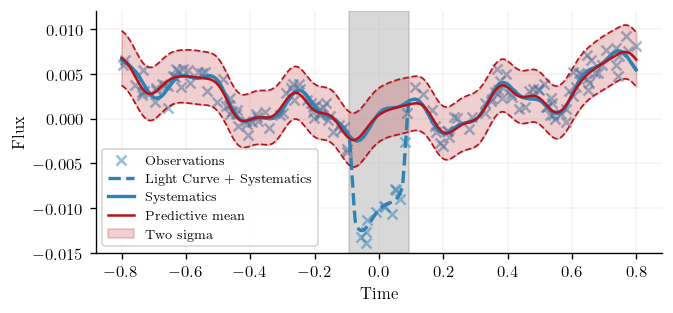

In [6]:
assert isinstance(model, gpx.gps.AbstractPosterior)

latent_dist = model(t.reshape(-1, 1), train_data=tree.data)
predictive_dist = model.likelihood(latent_dist)

predictive_mean = predictive_dist.mean()
predictive_std = predictive_dist.stddev()

fig, ax = plt.subplots()
ax.scatter(t_train, lc_train, label="Observations", color=cols[0], alpha=0.5)
ax.plot(
    t,
    lightcurve + systematics,
    label="Light Curve + Systematics",
    color=cols[0],
    linestyle="--",
    linewidth=2,
)
ax.plot(
    t,
    systematics,
    label="Systematics",
    color=cols[0],
    linestyle="-",
    linewidth=2,
)

ax.plot(
    t,
    predictive_mean,
    label="Predictive mean",
    color=cols[1],
)
ax.fill_between(
    t,
    predictive_mean - 2 * predictive_std,
    predictive_mean + 2 * predictive_std,
    alpha=0.2,
    label="Two sigma",
    color=cols[1],
)
ax.plot(
    t,
    predictive_mean - 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)
ax.plot(
    t,
    predictive_mean + 2 * predictive_std,
    linestyle="--",
    linewidth=1,
    color=cols[1],
)

ax.fill_between(
    t,
    -0.015,
    0.012,
    where=~mask,
    alpha=0.3,
    color="grey",
    zorder=0,
)
ax.set_ylim([-0.015, 0.012])
ax.set_ylabel("Flux")
ax.set_xlabel("Time")

ax.legend(loc="center left", bbox_to_anchor=(0, 0.23))
plt.savefig("figures/gp_fit.pdf")

In [7]:
assert isinstance(model, gpx.gps.AbstractPosterior)

model2 = model.likelihood * gpx.gps.Prior(
    mean_function=model.prior.mean_function,
    kernel=model.prior.kernel.kernels[0],  # type: ignore
)
model3 = model.likelihood * gpx.gps.Prior(
    mean_function=model.prior.mean_function,
    kernel=model.prior.kernel.kernels[1],  # type: ignore
)

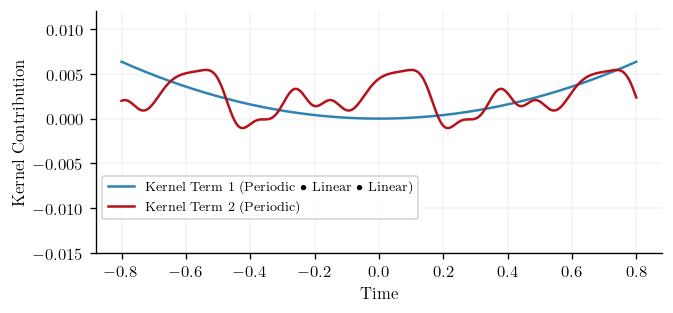

In [8]:
latent_dist2 = model2(t.reshape(-1, 1), train_data=tree.data)
predictive_dist2 = model2.likelihood(latent_dist2)
predictive_mean2 = predictive_dist2.mean()

latent_dist3 = model3(t.reshape(-1, 1), train_data=tree.data)
predictive_dist3 = model3.likelihood(latent_dist3)
predictive_mean3 = predictive_dist3.mean()

fig, ax = plt.subplots()

ax.plot(
    t,
    predictive_mean2,
    label=r"Kernel Term 1 (Periodic $\bullet$ Linear $\bullet$ Linear)",
    color=cols[0],
)

ax.plot(
    t,
    predictive_mean3,
    label="Kernel Term 2 (Periodic)",
    color=cols[1],
)

ax.set_ylim([-0.015, 0.012])
ax.set_ylabel("Kernel Contribution")
ax.set_xlabel("Time")

ax.legend(loc="center left", bbox_to_anchor=(0, 0.23))
plt.savefig("figures/gp_fit_decompostion.pdf")